# Bootstrapping

In [209]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [139]:
# Data
## loading the data

Penn = pd.read_csv("C:/Users/Alvaro/Documents/PUCP/Ciclo 2022-1/ML.2022.1/data/penn_jae.dat" , sep="\s", engine="python")
Penn

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,NaN
1,10635,2,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,NaN
2,10551,5,18,6,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,NaN
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13908,10831,5,27,27,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,NaN
13909,10677,2,4,4,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,NaN
13910,10817,4,4,4,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,NaN
13911,10691,0,27,27,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,NaN


In [193]:
# Subset T4

Penn = Penn[ (Penn["tg"] == 4) | (Penn["tg"] == 0) ]
print(Penn.shape)

(5099, 26)


In [194]:
Penn.dtypes

abdt            float64
tg              float64
inuidur1        float64
inuidur2        float64
female          float64
black           float64
hispanic        float64
othrace         float64
dep             float64
q1              float64
q2              float64
q3              float64
q4              float64
Unnamed: 13     float64
q5              float64
q6              float64
recall          float64
agelt35         float64
agegt54         float64
durable         float64
nondurable      float64
lusd            float64
husd            float64
muld            float64
log_inuidur1    float64
T4                int32
dtype: object

In [195]:
# Transform inuidur1 to log
Penn["log_inuidur1"] = np.log(Penn["inuidur1"])
Penn['T4']=(Penn[['tg']]==4).astype(int)

Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,log_inuidur1,T4
0,10824.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,2.890372,0
3,10824.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.000000,0
4,10747.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,3.295837,0
11,10607.0,4.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,2.197225,1
12,10831.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,3.295837,0


In [196]:
Penn.dtypes

abdt            float64
tg              float64
inuidur1        float64
inuidur2        float64
female          float64
black           float64
hispanic        float64
othrace         float64
dep             float64
q1              float64
q2              float64
q3              float64
q4              float64
Unnamed: 13     float64
q5              float64
q6              float64
recall          float64
agelt35         float64
agegt54         float64
durable         float64
nondurable      float64
lusd            float64
husd            float64
muld            float64
log_inuidur1    float64
T4                int32
dtype: object

In [197]:
# Function to get sample.

def get_indices(Penn,num_samples):
    return  np.random.choice(Penn.index, num_samples, replace=True)

In [200]:
get_indices(Penn,Penn.shape[0])

array([4110, 8512, 4372, ..., 13047, 6845, 10049], dtype=object)

In [228]:
# Define function to get estimates from our model equation.

def get_estimates(Penn,index):
    X = Penn[["T4","female","black","othrace","dep","q2","q3","q4","q5","q6","agelt35","agegt54","durable","lusd","husd"]].loc[index]
    y = Penn["log_inuidur1"].loc[index]
    
    lr = LinearRegression()
    lr.fit(X,y)
    coef = lr.coef_
    return [coef]

In [295]:
# Bootstrap process

def boot(Penn,func,R):

    #We create empty list of the variables of interest
    T4 = []
    female = []  
    black = []

    # Loop for each variable
    for i in range(R):
        T4.append(func(Penn,get_indices(Penn,Penn.shape[0]))[0][0]) # index [] represents position in equation
        female.append(func(Penn,get_indices(Penn,Penn.shape[0]))[0][1]) 
        black.append(func(Penn,get_indices(Penn,Penn.shape[0]))[0][2]) 

        
    T4_statistics = {"estimated_mean":np.mean(T4),"std_error":np.std(T4)}   
    female_statistics = {"estimated_mean":np.mean(female),"std_error":np.std(female)}
    black_statistics = {"estimated_mean":np.mean(black),"std_error":np.std(black)}   

    return {"T4_estimator":T4_statistics,"female_estimator":female_statistics, "black_estimator": black_statistics} 

In [296]:
# 1000 bootstraps

results = boot(Penn,get_estimates,1000)
results

{'T4_estimator': {'estimated_mean': -0.07427484885314675,
  'std_error': 0.03538551432205863},
 'female_estimator': {'estimated_mean': 0.13787475708232586,
  'std_error': 0.03436176800231909},
 'black_estimator': {'estimated_mean': -0.308672141930314,
  'std_error': 0.06108714482162613}}

In [306]:
# Table of results

df =pd.DataFrame.from_dict(results,orient='index')
df

,estimated_mean,std_error
T4_estimator,-0.074275,0.035386
female_estimator,0.137875,0.034362
black_estimator,-0.308672,0.061087


# Comparative models

In [1]:
import pyreadr
import math
import matplotlib.pyplot as plt
import random

In [2]:
rdata_read = pyreadr.read_r("cps2012.Rdata")

# Extracting the data frame from rdata_read
data = rdata_read[ 'data' ]

data.shape

(29217, 23)

In [6]:
data = data.drop( 'year', axis = 1)

In [7]:
data.head()

,lnw,female,widowed,divorced,separated,nevermarried,hsd08,hsd911,hsg,cg,...,so,we,exp1,exp2,exp3,exp4,weight,married,ne,sc
0,1.909543,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,22.0,4.84,10.648,23.4256,569.43,True,True,True
1,1.365773,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,30.0,9.00,27.000,81.0000,625.96,True,True,False
2,2.540223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,19.0,3.61,6.859,13.0321,264.22,True,True,False
3,1.801091,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,14.0,1.96,2.744,3.8416,256.81,True,True,False
4,3.349904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,15.0,2.25,3.375,5.0625,256.81,True,True,False


(0.0, 20000.0)

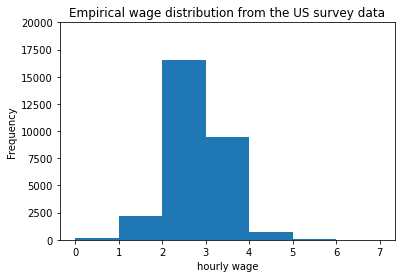

In [24]:
# Log Wage
plt.hist(data.lnw , bins = np.arange(0, 8, 1) )
plt.xlabel('hourly wage')
plt.ylabel('Frequency')
plt.title( 'Empirical wage distribution from the US survey data' )
plt.ylim((0, 20000))

### Analysis

1. Data splitting process

In [26]:
from numpy.random import default_rng

In [27]:
nrow = data.shape[0]
length = int(nrow*(3/4)) #  divide 75% for train and 25% for test

In [28]:

random.seed(30)
rng = default_rng()

#size = length to use all values from sample train
training = rng.choice(nrow, size = length, replace=False) # random sample
training_bool = data.index.isin( training )

#data_train = data.iloc[training,:] # Alternative

data_train = data[training_bool]
data_test = data[~training_bool] # for test use the complement of the data

In [33]:
data_train.shape

(21912, 22)

In [34]:
data_test.shape

(7305, 22)

2. Make matrix of results


In [37]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy   # modelmatrix version of phyton

In [55]:
# Define Basic Model and Flex Model

formula_basic = "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3)"
    
formula_flex = "lnw ~ female + female : (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so + we + exp1 + exp2 + exp3) + (widowed + divorced + separated + nevermarried + hsd08 + hsd911 + hsg + cg + ad + mw + so +we + exp1 + exp2 + exp3)**2"


In [44]:
# BASIC MODEL

#get matrix of y an x for train data
y_basic_train, model_X_basic_train = patsy.dmatrices(formula_basic, data_train, return_type='dataframe')

#get matrix of y and X for for test data
y_basic_test, model_X_basic_test = patsy.dmatrices(formula_basic, data_test, return_type='dataframe')
p_basic = model_X_basic_train.shape[ 1 ]

In [56]:
# FLEX MODEL

#get matrix of y an X for train data
y_flex_train, model_X_flex_train = patsy.dmatrices(formula_flex, data_train, return_type='dataframe')

#get matrix of y and x for test data
y_flex_test, model_X_flex_test = patsy.dmatrices(formula_flex, data_test, return_type='dataframe')
p_flex = model_X_flex_train.shape[ 1 ]

In [58]:
# Number of regressor per model
print(p_basic)
print(p_flex)

17
137


In [60]:
# Y is the same for both models basic and flex.

Y_train = data_train['lnw']
Y_test = data_test['lnw']

### Linear Models

In this section we present the basic and flex regressions on the following linear models:
OLS, Lasso (HDM), Lasso - CV ,Elastic Net - CV, Ridge lasso - CV.

#### OLS

In [61]:
#Basic Model

lm_basic = sm.OLS( Y_train, model_X_basic_train )
fit_lm_basic = lm_basic.fit()

# Compute the Out-Of-Sample Performance (capacidad de ajuste o prediccion)
yhat_lm_basic = fit_lm_basic.predict( model_X_basic_test )

print( f"The mean squared error (MSE) using the basic model is equal to , {np.mean((Y_test-yhat_lm_basic)**2)} ") # MSE OLS (basic model)    

The mean squared error (MSE) using the basic model is equal to , 0.3690577832952085 


In [62]:
# MSE and standard error

resid_basic = (Y_test-yhat_lm_basic)**2 #residuals squared

MSE_lm_basic = sm.OLS( resid_basic , np.ones( resid_basic.shape[0] ) ).fit().summary2().tables[1].iloc[0, 0:2]
MSE_lm_basic

Coef.       0.369058
Std.Err.    0.013780
Name: const, dtype: float64

In [63]:
# R-squared
R2_lm_basic = 1 - ( MSE_lm_basic[0]/Y_test.var() ) # R square formula
print( f"The R^2 using the basic model is equal to, {R2_lm_basic}" )  

The R^2 using the basic model is equal to, 0.12243154645125243


In [65]:
# OLS
# Flex Model

lm_flex = sm.OLS( Y_train, model_X_flex_train )
fit_lm_flex = lm_flex.fit()

yhat_lm_flex = fit_lm_flex.predict( model_X_flex_test )

print( f"The mean squared error (MSE) using theflexible model is equal to , {np.mean((Y_test-yhat_lm_flex)**2)} ") 

The mean squared error (MSE) using theflexible model is equal to , 0.31680225105756443 


In [66]:
# MSE and Standard error

resid_flex = (Y_test-yhat_lm_flex)**2

MSE_lm_flex = sm.OLS( resid_flex , np.ones( resid_flex.shape[0] ) ).fit().summary2().tables[1].iloc[0, 0:2]
MSE_lm_flex

Coef.       0.316802
Std.Err.    0.013016
Name: const, dtype: float64

In [67]:
R2_lm_flex = 1 - ( MSE_lm_flex[0]/Y_test.var() )

print( f"The R^2 using the flex model is equal to, {R2_lm_flex}" ) 

The R^2 using the flex model is equal to, 0.24668798728743813


#### Lasso, Ridge and Elastic Net

In [69]:
import hdmpy

In [70]:
# Lasso HDM
fit_rlasso = hdmpy.rlasso( model_X_basic_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = False )
fit_rlasso_post = hdmpy.rlasso( model_X_basic_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = True )


C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\func

#### Basic Model

Lasso and Post-Lasso

In [71]:
# We have to normalize the varibles. 
# this always do when working with data with significant different ragen such as age and wealth. 
# to do that we dierenciate the betas with their mean. 

# Getting mean of each variable (column)
meanx = model_X_basic_test.mean( axis = 0 ).values.\
                        reshape( model_X_basic_test.shape[ 1 ] , 1 )

# Reducing the mean (standarize)
new_x1 = model_X_basic_test.to_numpy() - \
                    (np.ones( ( model_X_basic_test.shape[ 0 ] , 1 ) ) @ meanx.T) # each column has the mean for aeach varialbe

# Getting the significant variables
x1_est_rlasso = new_x1[ :, fit_rlasso.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables (betas different from zero)
beta_rlasso = fit_rlasso.est['beta'].loc[ fit_rlasso.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso = (x1_est_rlasso @ beta_rlasso) + np.mean( Y_test.to_numpy() )
residuals_rlasso = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso

In [74]:
# Post Lasso
# same process for Post Lasso

# Getting mean of each variable
meanx = model_X_basic_test.mean( axis = 0 ).values.\
                        reshape( model_X_basic_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_basic_test.to_numpy() - \
                    (np.ones( ( model_X_basic_test.shape[ 0 ] , 1 ) ) @ meanx.T)

# Getting the significant variables
x1_est_rlasso_post = new_x1[ :, fit_rlasso_post.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso_post = fit_rlasso_post.est['beta'].loc[ fit_rlasso_post.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso_post = (x1_est_rlasso_post @ beta_rlasso_post) + np.mean( Y_test.to_numpy() )
residuals_rlasso_post = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso_post

In [77]:
# MSE for lasso and post lasso of Basic Model

MSE_lasso = sm.OLS( ( residuals_rlasso )**2 , np.ones( yhat_rlasso.size )  ).fit().summary2().tables[1].round(3)
MSE_lasso_post = sm.OLS( ( residuals_rlasso_post )**2  , np.ones( yhat_rlasso_post.size )  ).fit().summary2().tables[1].round(3)

In [76]:
# R squared for lasso and post lasso of Basic Model

R2_lasso = 1 - MSE_lasso.iloc[0, 0]/ np.var( Y_test )
R2_lasso_post = 1 - MSE_lasso_post.iloc[0, 0]/ np.var( Y_test )

print( f"The R^2 using the basic model is equal to {R2_lasso},for lasso and {R2_lasso_post} for post-lasso") # R^2 lasso/post-lasso (basic model) 

The R^2 using the basic model is equal to 0.11769244196341644,for lasso and 0.11769244196341644 for post-lasso


#### Flex Model

Lasso and Post-Lasso

In [78]:
fit_rlasso_flex = hdmpy.rlasso( model_X_flex_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = False )
fit_rlasso_post_flex = hdmpy.rlasso( model_X_flex_train.to_numpy() , Y_train.to_numpy().reshape( Y_train.size , 1 ) , post = True )

C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\func

In [79]:
# Lasso for flex model

# Getting mean of each variable
meanx = model_X_flex_test.mean( axis = 0 ).values.\
                        reshape( model_X_flex_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_flex_test.to_numpy() - \
                    (np.ones( ( model_X_flex_test.shape[ 0 ] , 1 ) ) @ meanx.T)

# Getting the significant variables
x1_est_rlasso_flex = new_x1[ :, fit_rlasso_flex.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso_flex = fit_rlasso_flex.est['beta'].loc[ fit_rlasso_flex.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso_flex = (x1_est_rlasso_flex @ beta_rlasso_flex) + np.mean( Y_test.to_numpy() )
residuals_rlasso_flex = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso_flex

In [80]:
# Post lasso for flex model

# Getting mean of each variable
meanx = model_X_flex_test.mean( axis = 0 ).values.\
                        reshape( model_X_flex_test.shape[ 1 ] , 1 )

# Reducing the mean
new_x1 = model_X_flex_test.to_numpy() - \
                    (np.ones( ( model_X_flex_test.shape[ 0 ] , 1 ) ) @ meanx.T)

# Getting the significant variables
x1_est_rlasso_post_flex = new_x1[ :, fit_rlasso_post_flex.est['index'].iloc[:, 0].to_list()]

# Getting the coef. from significant variables
beta_rlasso_post_flex = fit_rlasso_post_flex.est['beta'].loc[ fit_rlasso_post_flex.est['index'].\
                                     iloc[:, 0].to_list(), ].to_numpy()

# yhat
yhat_rlasso_post_flex = (x1_est_rlasso_post_flex @ beta_rlasso_post_flex) + np.mean( Y_test.to_numpy() )
residuals_rlasso_post_flex = Y_test.to_numpy().reshape( Y_test.to_numpy().size, 1)  - yhat_rlasso_post_flex

In [82]:
# MSE for lasso and post lasso of Flex Model
MSE_lasso_flex = sm.OLS( ( residuals_rlasso_flex )**2 , np.ones( yhat_rlasso_flex.size )  ).fit().summary2().tables[1].round(3)
MSE_lasso_post_flex = sm.OLS( ( residuals_rlasso_post_flex )**2  , np.ones( yhat_rlasso_post_flex.size )  ).fit().summary2().tables[1].round(3)

In [83]:
# R squared for lasso and post lasso of Flex Model
R2_lasso_flex = 1 - MSE_lasso.iloc[0, 0]/ np.var( Y_test )
R2_lasso_post_flex = 1 - MSE_lasso_post_flex.iloc[0, 0]/ np.var( Y_test )

print( f"The R^2 using the basic model is equal to {R2_lasso_flex} for lasso and {R2_lasso_post_flex} for post-lasso")


The R^2 using the basic model is equal to 0.11769244196341644 for lasso and 0.24611456631375472 for post-lasso


### Lasso CV, Ridge Lasso and Elastic Net

In [84]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, ElasticNetCV
import statsmodels.api as sm

In [85]:
# this pkg. does the same process to standarize the Y 
# equal as previous code

Y_vec = Y_train.to_numpy().reshape( Y_train.to_numpy().size, 1)

# Scalar distribution

scaler = StandardScaler()
scaler.fit( Y_vec )
std_Y = scaler.transform( Y_vec ) #standarize

std_Y 

array([[-1.32232997],
       [-0.3766169 ],
       [-1.4849546 ],
       ...,
       [-0.09861292],
       [ 0.52615172],
       [-0.53647947]])

#### Basic Model

In [86]:
# now stadarrize X

# Reshaping Y variable
Y_vec = Y_train.to_numpy().reshape(-1, 1)

# Scalar distribution
scaler = StandardScaler()
scaler.fit( Y_vec )  # mean and standar deviation
std_Y = scaler.transform( Y_vec )  # scale 

# Regressions cv = Cross Validation (10 folds)
fit_lasso_cv_basic = LassoCV(cv = 10 , random_state = 0 , normalize = True ).fit( model_X_basic_train, std_Y )

#these two models require theory not seen in class
fit_ridge_basic = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.0001 ).fit( model_X_basic_train , std_Y )
fit_elnet_basic = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.5, max_iter = 100000 ).fit( model_X_basic_train , std_Y )

# Predictions using test data

yhat_lasso_cv_basic = scaler.inverse_transform( fit_lasso_cv_basic.predict( model_X_basic_test ).reshape(-1, 1) )
yhat_ridge_basic = scaler.inverse_transform( fit_ridge_basic.predict( model_X_basic_test ).reshape(-1, 1) )
yhat_elnet_basic = scaler.inverse_transform( fit_elnet_basic.predict( model_X_basic_test ).reshape(-1, 1) )

C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.207397852762369, tolerance: 1.9873272633479093
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.862676885353721, tolerance: 1.9873272633479093
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarni

C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.794492163040559, tolerance: 1.9444896330434223
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.675806674618798, tolerance: 1.9444896330434223
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.591271941117157, tolerance: 1.9444896330434223
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWa

In [87]:
# MSE for each method

MSE_lasso_cv_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_lasso_cv_basic)**2 ) , np.ones( yhat_lasso_cv_basic.shape )  ).fit().summary2().tables[1].round(3)
MSE_ridge_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_ridge_basic)**2 ) , np.ones( yhat_ridge_basic.size )  ).fit().summary2().tables[1].round(3)
MSE_elnet_basic = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_elnet_basic)**2 ) , np.ones( yhat_elnet_basic.size )  ).fit().summary2().tables[1].round(3)

In [89]:
# R Squared for each method

R2_lasso_cv_basic = 1- MSE_ridge_basic.iloc[0,0] / np.var( Y_test )
R2_ridge_basic = 1- MSE_lasso_cv_basic.iloc[0,0] / np.var( Y_test )
R2_elnet_basic = 1- MSE_elnet_basic.iloc[0,0] / np.var( Y_test )
print( f"R^2 using cross-validation for lasso, ridge and elastic net in the basic model: {R2_lasso_cv_basic},{R2_ridge_basic},{R2_elnet_basic}")


R^2 using cross-validation for lasso, ridge and elastic net in the basic model: 0.0011612550529243038,0.12244881693935483,0.12007062945138558


#### Flex Model

In [90]:
# now use the same methods but for our flexible model 

# Reshaping Y variable
Y_vec = Y_train.to_numpy().reshape( -1, 1)

# Scalar distribution
scaler = StandardScaler()
scaler.fit( Y_vec )
std_Y = scaler.transform( Y_vec )

# Regressions
fit_lasso_cv_flex = LassoCV(cv = 10 , random_state = 0 , normalize = True ).fit( model_X_flex_train, std_Y )
fit_ridge_flex = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.0001 ).fit( model_X_flex_train , std_Y )
fit_elnet_flex = ElasticNetCV( cv = 10 , normalize = True , random_state = 0 , l1_ratio = 0.5, max_iter = 100000 ).fit( model_X_flex_train , std_Y )

# Predictions
yhat_lasso_cv_flex = scaler.inverse_transform( fit_lasso_cv_flex.predict( model_X_flex_test ).reshape(-1,1) )
yhat_ridge_flex = scaler.inverse_transform( fit_ridge_flex.predict( model_X_flex_test ).reshape(-1,1) )
yhat_elnet_flex = scaler.inverse_transform( fit_elnet_flex.predict( model_X_flex_test ).reshape(-1,1) )

C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.274025464874285, tolerance: 1.9873272633479093
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.760125633822099, tolerance: 1.9873272633479093
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarni

C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8466959956804203, tolerance: 1.9791625533645683
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6092295405178447, tolerance: 1.9791625533645683
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.689568534548016, tolerance: 1.9791625533645683
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4811243639414897, tolerance: 1.9756524665988804
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.208428575631842, tolerance: 1.9756524665988804
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8063098575403274, tolerance: 1.9756524665988804
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.p

In [91]:
#MSE for each method in flex model

MSE_lasso_cv_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_lasso_cv_flex)**2 ) , np.ones( yhat_lasso_cv_flex.shape )  ).fit().summary2().tables[1].round(3)
MSE_ridge_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_ridge_flex)**2 ) , np.ones( yhat_ridge_flex.size )  ).fit().summary2().tables[1].round(3)
MSE_elnet_flex = sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - yhat_elnet_flex)**2 ) , np.ones( yhat_elnet_flex.size )  ).fit().summary2().tables[1].round(3)

In [92]:
# R squared for each method
R2_lasso_cv_flex = 1- MSE_ridge_flex.iloc[0,0] / np.var( Y_test )
R2_ridge_flex = 1- MSE_lasso_cv_flex.iloc[0,0] / np.var( Y_test )
R2_elnet_flex = 1- MSE_elnet_flex.iloc[0,0] / np.var( Y_test )

print( f"R^2 using cross-validation for lasso, ridge and elastic net in the basic model: {R2_lasso_cv_flex},{R2_ridge_flex},{R2_elnet_flex}")

R^2 using cross-validation for lasso, ridge and elastic net in the basic model: 0.003539442540893445,0.24849275380172398,0.24849275380172398


### Non-Linear Models

In [93]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #Not used this time
from sklearn import tree
from scipy.sparse import diags
from IPython.display import Image, display
from sklearn.model_selection import cross_val_score

#### Tree Regression

In [95]:
trees = DecisionTreeRegressor( random_state = 0, min_impurity_decrease = 0 )

In [96]:
trees_fit =  trees.fit( model_X_basic_train, y_basic_train )

In [97]:
list(trees_fit.feature_importances_)

[0.0,
 0.0,
 0.010881432709454403,
 0.03221180873779924,
 0.01573816538670708,
 0.04147920419535645,
 0.007144541089182524,
 0.016123369557978905,
 0.25217750893893065,
 0.10180835624876892,
 0.11872700142502135,
 0.023998113109269244,
 0.035187100032184476,
 0.022500293268659682,
 0.07632001126231233,
 0.16993493553824482,
 0.07576815850012979]

In [98]:
trees_fit.get_depth()  

29

In [99]:
trees_fit.get_n_leaves() # number os leaves tree

# As we can see, our tree is to deep and needs to be prune.

1959

In [118]:
y_hat_tree = trees_fit.predict(model_X_basic_test)

# MSE of NOT prune tree

MSE_tree= sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - y_hat_tree.reshape(-1,1))**2 ) , np.ones( y_hat_tree.shape )  ).fit().summary2().tables[1].round(3)

# R squared using NOT prune tree

R2_tree = 1- MSE_tree.iloc[0,0] / np.var( Y_test )

print( f"R^2 using prune tree: {R2_tree}")

R^2 using prune tree: 0.017808567468708847


#### Pruned tree regression

In [100]:
#Prunning. 

#We get a list of optimal alphas to penalize leafs.
# each alpha is assosiate to the deph of the tree.
path = trees.cost_complexity_pruning_path( model_X_basic_train, y_basic_train )

alphas, impurities = path.ccp_alphas, path.impurities

In [101]:
alphas

array([0.00000000e+00, 4.05338819e-20, 8.10677638e-20, ...,
       1.36655210e-03, 8.20523500e-03, 2.03382672e-02])

In [103]:
# Build alphas table

mean1, std1 = [], []

# Loop
for i in alphas:
     tree_initial = DecisionTreeRegressor(ccp_alpha=i, random_state=0)
# 10 fold cross validation for each alpha value
     scores = cross_val_score(tree_initial, model_X_basic_train, y_basic_train, scoring='neg_mean_squared_error', cv=10)
     mean1.append(scores.mean()), std1.append(scores.std())
            
# keep a record of the values of alpha, mean accuracy rate, standard deviation of accuracies

table = pd.DataFrame({"alpha": alphas, "mean": mean1, "std": std1})
table["mean"] = (-1)*table["mean"] # *-1 because Python gets results in negative.
table = table.sort_values(["mean"], ascending = True) #order ascending. First in the min MSE
table.head(10)

,alpha,mean,std
1325,0.001300,0.399938,0.033709
1326,0.001367,0.401054,0.033867
1323,0.000554,0.402468,0.030953
1324,0.000604,0.403087,0.030874
1322,0.000477,0.404182,0.031768
1321,0.000477,0.404182,0.031768
1320,0.000405,0.404961,0.033697
1316,0.000247,0.404980,0.033536
1317,0.000257,0.405008,0.033549
1318,0.000268,0.405016,0.033470


In [105]:
# we set then the alpha with min MSE. table.iloc[1,0]

prune_tree =  DecisionTreeRegressor(ccp_alpha=table.iloc[1,0], random_state=0)

prune_tree_fit = prune_tree.fit(model_X_basic_train, y_basic_train)

In [106]:
prune_tree_fit.get_depth()  # depth's tree

4

In [107]:
prune_tree_fit.get_n_leaves() # number leaves tree

5

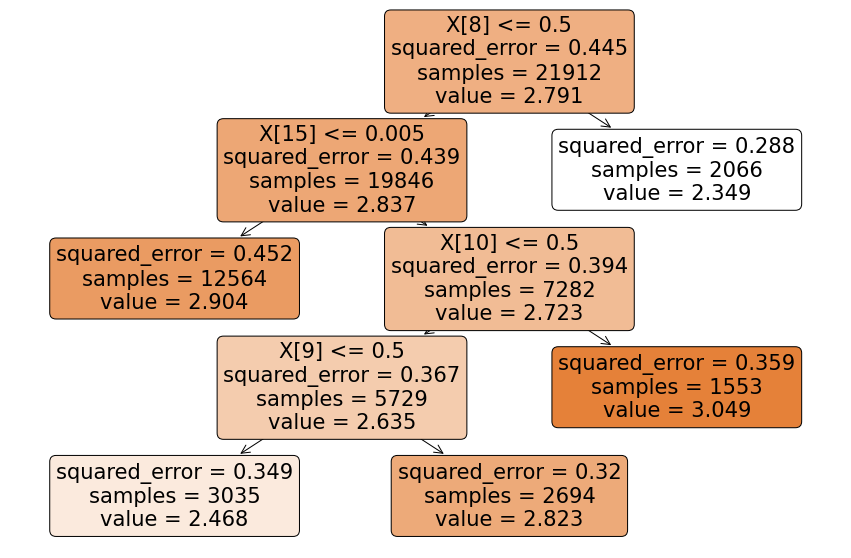

In [110]:
#Tree plot

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree( prune_tree_fit , filled = True , rounded = True  )

In [112]:
list(model_X_basic_train.columns)[8]

'female:hsg'

In [113]:
list(model_X_basic_train.columns)[15]

'female:exp2'

In [114]:
list(model_X_basic_train.columns)[10]

'female:ad'

In [115]:
list(model_X_basic_train.columns)[9]

'female:cg'

In [119]:
y_hat_pt = prune_tree_fit.predict(model_X_basic_test)

# MSE of prune tree

MSE_pt= sm.OLS( ((Y_test.to_numpy().reshape(-1,1) - y_hat_pt.reshape(-1,1))**2 ) , np.ones( y_hat_pt.shape )  ).fit().summary2().tables[1].round(3)

# R squared using prune tree

R2_pt = 1- MSE_pt.iloc[0,0] / np.var( Y_test )

print( f"R^2 using prune tree: {R2_pt}")

R^2 using prune tree: 0.10817969201153943


### Results

In [125]:
table= np.zeros( (14, 3) )
table[0,0:2]   = MSE_lm_basic
table[1,0:2]   = MSE_lm_flex
table[2,0:2]   = MSE_lasso.iloc[0, [0, 1]]
table[3,0:2]   = MSE_lasso_post.iloc[0, [0, 1]]
table[4,0:2]   = MSE_lasso_flex.iloc[0, [0, 1]]
table[5,0:2]   = MSE_lasso_post_flex.iloc[0, [0, 1]]
table[6,0:2]   = MSE_lasso_cv_basic.iloc[0, [0, 1]]
table[7,0:2]   = MSE_ridge_basic.iloc[0, [0, 1]]
table[8,0:2]   = MSE_elnet_basic.iloc[0, [0, 1]]
table[9,0:2]   = MSE_lasso_cv_flex.iloc[0, [0, 1]]
table[10,0:2]  = MSE_ridge_flex.iloc[0, [0, 1]]
table[11,0:2]  = MSE_elnet_flex.iloc[0, [0, 1]]
table[12,0:2]  = MSE_tree.iloc[0, [0, 1]]
table[13,0:2]  = MSE_pt.iloc[0, [0, 1]]



table[0,2]   = R2_lm_basic
table[1,2]   = R2_lm_flex
table[2,2]   = R2_lasso
table[3,2]   = R2_lasso_post
table[4,2]   = R2_lasso_flex
table[5,2]   = R2_lasso_post_flex
table[6,2]   = R2_lasso_cv_basic
table[7,2]   = R2_ridge_basic
table[8,2]   = R2_elnet_basic
table[9,2]   = R2_lasso_cv_flex
table[10,2]  = R2_ridge_flex
table[11,2]  = R2_elnet_flex
table[12,2]  = R2_tree
table[13,2]  = R2_pt




colnames_table= ["MSE", "S_E_ for MSE", "R-squared"]
rownames_table= ["Least Squares (basic)","Least Squares (flexible)", "Lasso", "Post-Lasso","Lasso (flexible)","Post-Lasso (flexible)", \
                    "Cross-Validated lasso", "Cross-Validated ridge","Cross-Validated elnet","Cross-Validated lasso (flexible)","Cross-Validated ridge (flexible)","Cross-Validated elnet (flexible)"
                    ,"Unpruned Tree", "Pruned Tree"]
table_pandas = pd.DataFrame( table, columns = colnames_table )
table_pandas.index = rownames_table

table_pandas = table_pandas.round(3)
table_html = table_pandas.to_latex()
table_pandas

,MSE,S_E_ for MSE,R-squared
Least Squares (basic),0.369,0.014,0.122
Least Squares (flexible),0.317,0.013,0.247
Lasso,0.371,0.014,0.118
Post-Lasso,0.371,0.014,0.118
Lasso (flexible),0.317,0.013,0.118
Post-Lasso (flexible),0.317,0.013,0.246
Cross-Validated lasso,0.369,0.014,0.001
Cross-Validated ridge,0.420,0.014,0.122
Cross-Validated elnet,0.370,0.014,0.120
Cross-Validated lasso (flexible),0.316,0.013,0.004


In [127]:
table_pandas.MSE.sort_values(ascending=True)

Cross-Validated lasso (flexible)    0.316
Cross-Validated elnet (flexible)    0.316
Least Squares (flexible)            0.317
Lasso (flexible)                    0.317
Post-Lasso (flexible)               0.317
Least Squares (basic)               0.369
Cross-Validated lasso               0.369
Cross-Validated elnet               0.370
Lasso                               0.371
Post-Lasso                          0.371
Pruned Tree                         0.375
Unpruned Tree                       0.413
Cross-Validated ridge (flexible)    0.419
Cross-Validated ridge               0.420
Name: MSE, dtype: float64

### Conclusions:
The methods with the lowest MSE are Cross Validated Elastic Net and the Cross Validated lasso. Both using the Flexible Model and their MSE = 0.316.
The second best methods are OLS (flexible), Lasso (flexible) and Post-Lasso (flexible). These 3 methods have a MSE = 0.317.

# Tree Regression 

Usually, to make regressions we assume a linear relation between variables. In the case where clusters might be found in the data, a linear regression is not the best way to estimate a prediction model. The best way is to use a Tree regression since it captures non-linear relations between the Y and the X regressors. For instance, a regression tree allows us to make a prediction using continuous or categorical variables. However, a regression tree always tries to predict a continuous value. 
The main concept of regression tree (also classifier tree) is to split the data in a binary criterion until it reaches pure leaf. Finally, each leaf represents a relevant cluster in our dataset. This allows to predict a in which group a new observation in the data corresponds by following the conditions node by node. 

The first step consists in determine under which value we split the first node. Therefore, we need to find the best splitting condition. For this step the computer tests each possible value to split the data and propose a set of candidates. In a scenario with multiple covariates, the algorithm evaluates each covariate one at time, and for each covariate estimates the proper split value by choosing the one with lowest sum squared errors. The variable that goes in the first node is the one with the lowest sum squared errors. This process repeats for each node. 

This step repeats for each possible split. However, the number of final leaves will depend on if it is needed to do an extra split in each leaf. This process can result in an overfitting of the data and the model can´t be generalize. To solve this, we have to prune the tree by setting penalization parameters on the impurities of the leaf.

First, we have to determine the optimal complexity of the tree. To do this we set the algorithm to prune or “cut” the leaf with a relatively small alpha. The smallest alphas are pruned first. We set an algorithm that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. Larger alphas mean more of the tree is pruned, which increases the total impurity of its leaves.

Next, we make a cross validation process for al the alphas proposed and calculate the accuracy mean for each alpha. The optimal alpha for our tree would be the one with the lowest mean accuracy rate. 

Finally. We set that value of alpha in the DecisionTreeRegressor function in Python to get our optimal depth and number of leaves. 

